In [46]:
using DelimitedFiles,HDF5, PyCall, PyPlot, NRRD,FileIO, TiffImages,Images, ProgressMeter, NaNStatistics, Statistics
using _Data, _CairoUtils
using NRRD, FileIO, ImageCore, AxisArrays, Unitful

In [45]:
@pyimport numpy as np
@pyimport scipy.io as io

In [4]:
experimenter = "chuyu"
server = 8

experiment_filename = "20230422_160839"
ds_save = Dataset(experiment_filename, experimenter, gethostname() == "roli-$(server)" ? "/data" : "/nfs/data$(server)")
result_path = joinpath(data_path(ds_save), "connectome")

"/nfs/data8/chuyu/data/20230422_160839/connectome"

# EM masks

In [5]:
mask_img = TiffImages.load(joinpath(result_path, "Reslice_downsampled_fine_aligned_volume_32x_alldims_masks_diameter1220231221_EM_model.tif"));
mask_img = convert(Array{Float32}, mask_img);

Loading: 100%|███████████████████████████████████████████| Time: 0:00:03


In [6]:
size(mask_img)

(643, 634, 905)

In [7]:
mask_img = convert(Array{UInt8}, mask_img.>0);

In [6]:
mask_img_rotate = zeros(UInt8, size(mask_img, 3), size(mask_img, 2), size(mask_img, 1))
@showprogress for x in 1:size(mask_img, 1)
    for y in 1:size(mask_img, 2)
        for z in 1:size(mask_img, 3)
            mask_img_rotate[size(mask_img, 3) - z + 1, y, size(mask_img, 1) - x + 1] = mask_img[x, y, z]
        end
    end
end

Progress: 100%|█████████████████████████████████████████| Time: 0:01:11


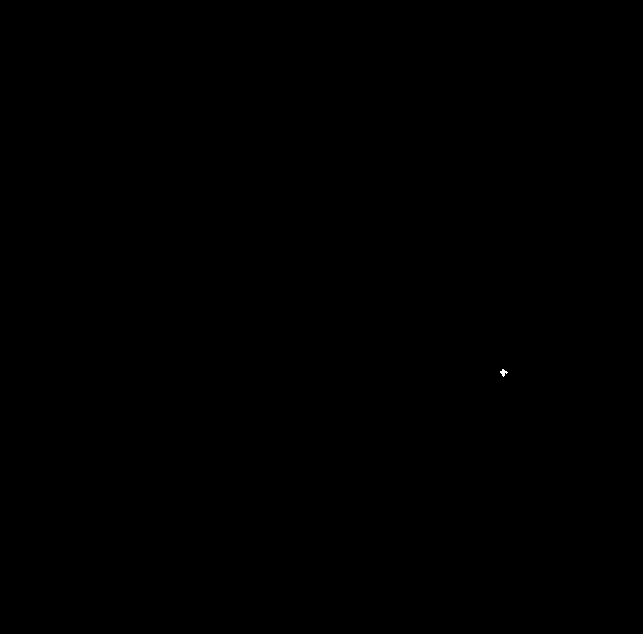

905

In [8]:
for z_idx = 1:2:size(mask_img,3)
    display(cim((Float32.(mask_img[:, :, z_idx]))))
    display(z_idx)
    sleep(0.01)
    IJulia.clear_output(true)
end

In [58]:
# volume = mask_img_rotate

# for i in 1:5:size(volume, 3)
#     IJulia.clear_output(true)
#     # Plot the current frame
#     imshow(volume[1:3:end, 1:3:end, i].T, vmin = minimum(volume), vmax = maximum(volume))
#     title(i)
#     display(gcf()) # gcf() gets the current figure, and display renders it in IJulia
#     sleep(0.01) # Adjust sleep duration for desired speed
# end

# close(fig) # Close the figure after the animation is done

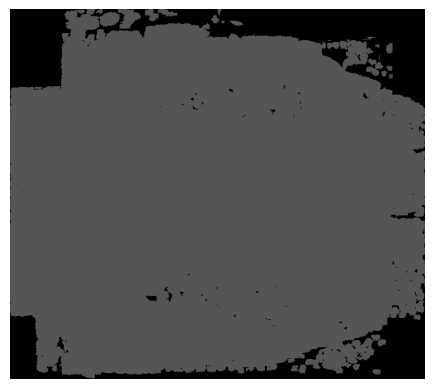

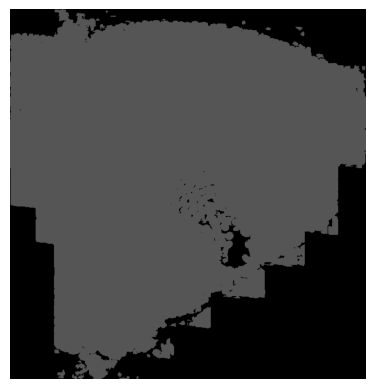

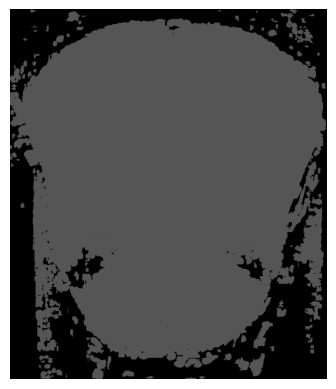

(-0.5, 569.5, 664.5, -0.5)

In [89]:
stack = mask_img_rotate
fig, ax = subplots(1,1)
fig_bg = nanmaximum(stack, dims=3)[:,:,1]
ax.imshow(fig_bg', cmap="gray", vmax=3)
axis("off")

fig, ax = subplots(1,1)
fig_bg = nanmaximum(stack, dims=2)[:,1,:]
ax.imshow(fig_bg', cmap="gray",aspect=1, vmax=3)
axis("off")


fig, ax = subplots(1,1)
fig_bg = nanmaximum(stack, dims=1)[1,:,:]
ax.imshow(fig_bg', cmap="gray",aspect=1, vmax=3)
axis("off")

In [85]:


data = UInt8.(mask_img_rotate*255)
spacing_x = 1/3u"μm" 
spacing_y = 1/3u"μm" 
spacing_z = 1/3u"μm"

# Create AxisArrays for each dimension, incorporating the spacing
# The ranges (1:size) multiplied by the spacing define the physical extent
ax_x = Axis{:x}((1:size(data, 1)) .* spacing_x)
ax_y = Axis{:y}((1:size(data, 2)) .* spacing_y)
ax_z = Axis{:z}((1:size(data, 3)) .* spacing_z)

# Create an AxisArray image from your data and axes
# The order of axes in the `AxisArray` constructor should match your data dimensions
img = AxisArray(data, ax_x, ax_y, ax_z)

# Specify the output file path
output_filename = joinpath(data_path(ds_save), "$(experiment_filename)_connectome_mask_img_rotate.nrrd")

# Save the image. FileIO.save will use NRRD.jl to handle the NRRD format.
save(output_filename, img)

242592000

In [78]:
output_filename

"/nfs/data8/chuyu/data/20230422_130558/20230422_130558_connectome_mask_img_rotate.nrrd"

In [30]:
mask_img_rotate = load(output_filename));

# LM PICA stack

In [11]:
filename = joinpath(result_path, "$(experiment_filename)_PICAstack.tif")
PICA_stack = Float32.(load(filename));
PICA_stack = np.swapaxes(PICA_stack, 0, 1);

Loading: 100%|███████████████████████████████████████████| Time: 0:00:01


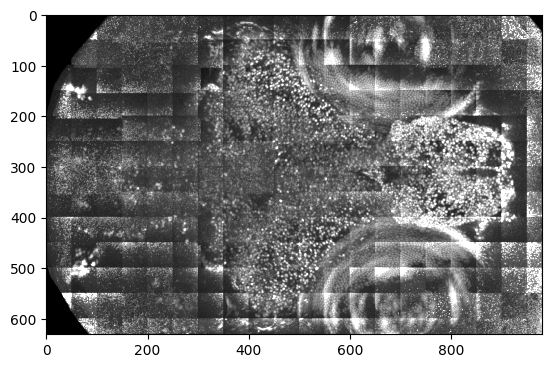

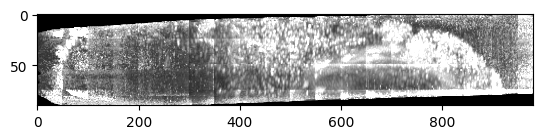

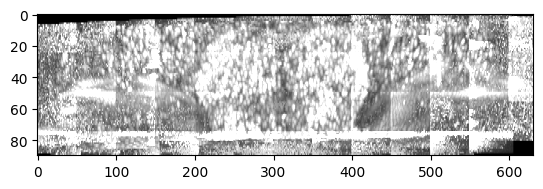

PyObject <matplotlib.image.AxesImage object at 0x707762bf2850>

In [13]:
stack = PICA_stack
fig, ax = subplots(1,1)
fig_bg = nanmaximum(stack, dims=3)[:,:,1]
ax.imshow(fig_bg', cmap="gray", vmax=0.1)

fig, ax = subplots(1,1)
fig_bg = nanmaximum(stack, dims=2)[:,1,:]
ax.imshow(fig_bg', cmap="gray",aspect=2, vmax=0.1)


fig, ax = subplots(1,1)
fig_bg = nanmaximum(stack, dims=1)[1,:,:]
ax.imshow(fig_bg', cmap="gray",aspect=2, vmax=0.1)


In [38]:
LM_stack = PICA_stack[625:930,190:430,:];

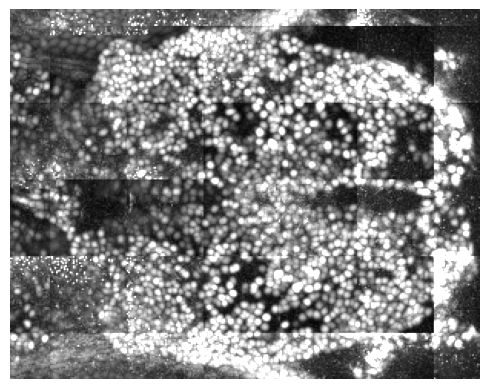

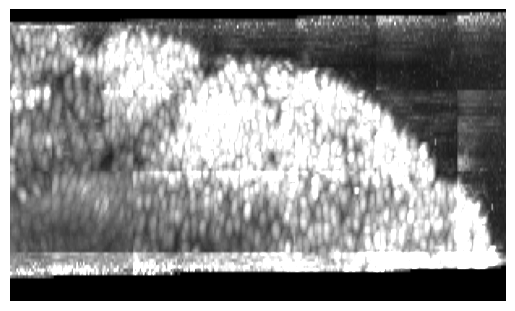

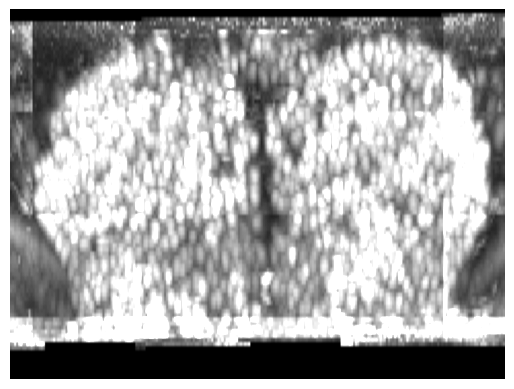

(-0.5, 240.5, 89.5, -0.5)

In [39]:
stack = LM_stack
fig, ax = subplots(1,1)
fig_bg = nanmaximum(stack, dims=3)[:,:,1]
ax.imshow(fig_bg', cmap="gray", vmax=0.1)
axis("off")

fig, ax = subplots(1,1)
fig_bg = nanmaximum(stack, dims=2)[:,1,:]
ax.imshow(fig_bg', cmap="gray",aspect=2, vmax=0.1)
axis("off")


fig, ax = subplots(1,1)
fig_bg = nanmaximum(stack, dims=1)[1,:,:]
ax.imshow(fig_bg', cmap="gray",aspect=2, vmax=0.1)
axis("off")

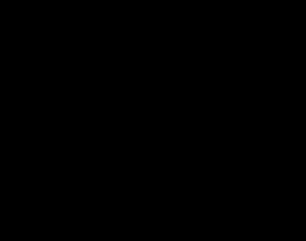

90

In [40]:
for z_idx = 1:size(LM_stack,3)
    display(cim((LM_stack[:, :, z_idx])*10))
    display(z_idx)
    sleep(0.01)
    IJulia.clear_output(true)
end

In [41]:
LM_stack = convert(Array{UInt8}, np.round(255*LM_stack/np.nanmax(LM_stack)));

In [48]:
data = LM_stack
spacing_x = 1u"μm" 
spacing_y = 1u"μm" 
spacing_z = 2u"μm"

# Create AxisArrays for each dimension, incorporating the spacing
# The ranges (1:size) multiplied by the spacing define the physical extent
ax_x = Axis{:x}((1:size(data, 1)) .* spacing_x)
ax_y = Axis{:y}((1:size(data, 2)) .* spacing_y)
ax_z = Axis{:z}((1:size(data, 3)) .* spacing_z)

# Create an AxisArray image from your data and axes
# The order of axes in the `AxisArray` constructor should match your data dimensions
img = AxisArray(data, ax_x, ax_y, ax_z)

# Specify the output file path
output_filename = joinpath(result_path, "$(experiment_filename)_PICA_crop_rotate.nrrd")

# Save the image. FileIO.save will use NRRD.jl to handle the NRRD format.
save(output_filename, img)

6637140